Dataset Preview:
     Day        Open  Volume       Close        High         Low         MA5  \
9    10  170.807258    2693  159.952929  172.632943  155.908833  148.011430   
10   11  102.058449    5752   99.624877  103.102433   96.119996  143.372177   
11   12  196.990985    9311  203.663213  205.210756  195.466006  162.057084   
12   13  183.244264    1830  188.152001  192.752076  182.114159  162.501039   
13   14  121.233911    6177  122.887414  127.382974  116.550520  154.856087   

          MA10  Price_Change    Return  Next_Close  Trend  
9   152.054989    -10.854329 -0.007195   99.624877      0  
10  147.527553     -2.433572 -0.377161  203.663213      1  
11  147.947819      6.672228  1.044301  188.152001      0  
12  149.659905      4.907737 -0.076161  122.887414      0  
13  146.133216      1.653503 -0.346872  118.108905      0  


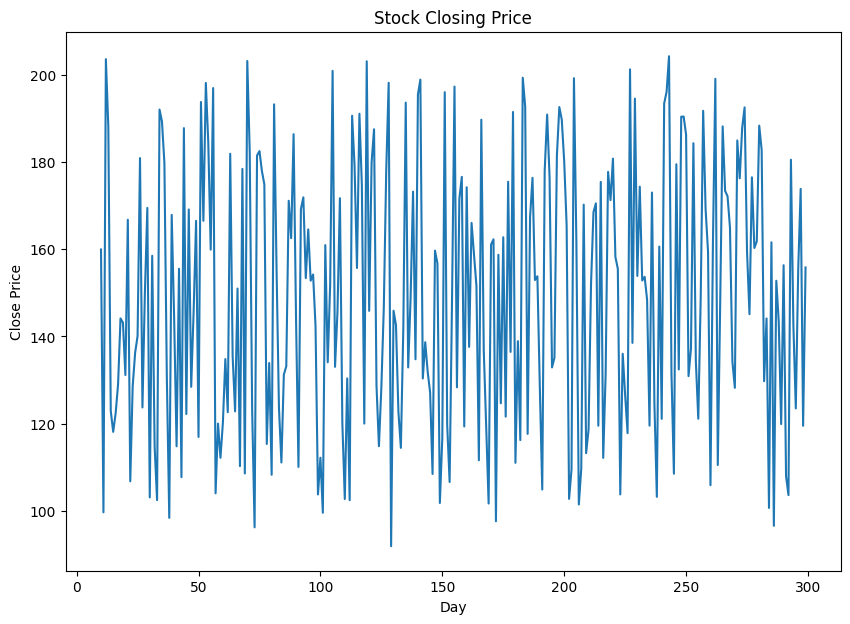

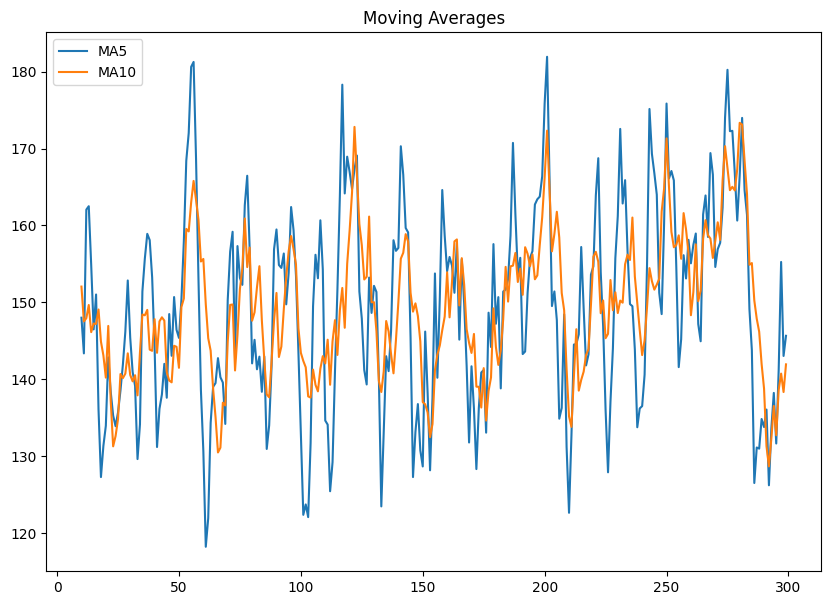

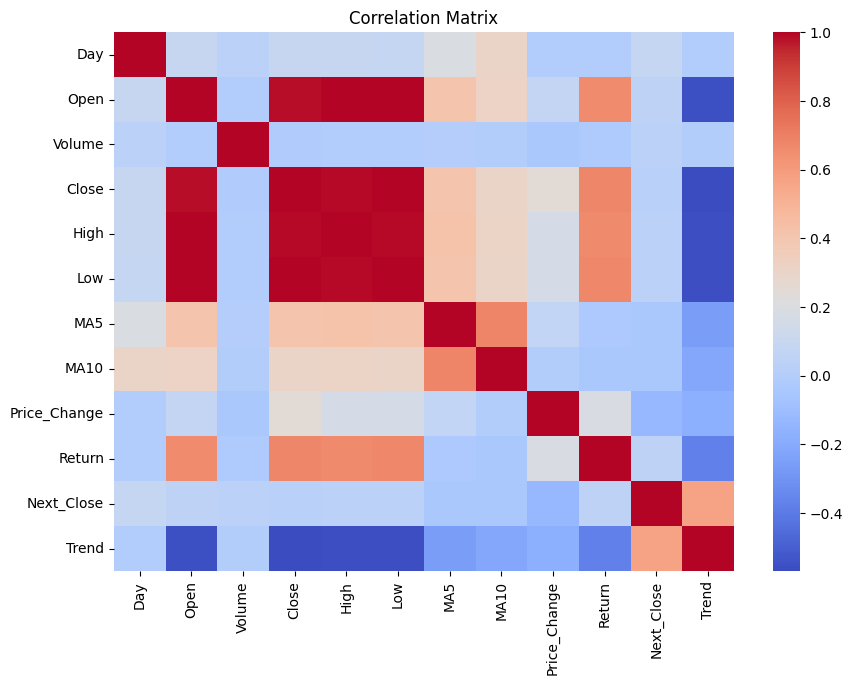


Regression Results
R2 Score: 0.056583477652249026
RMSE: 29.570596382331917


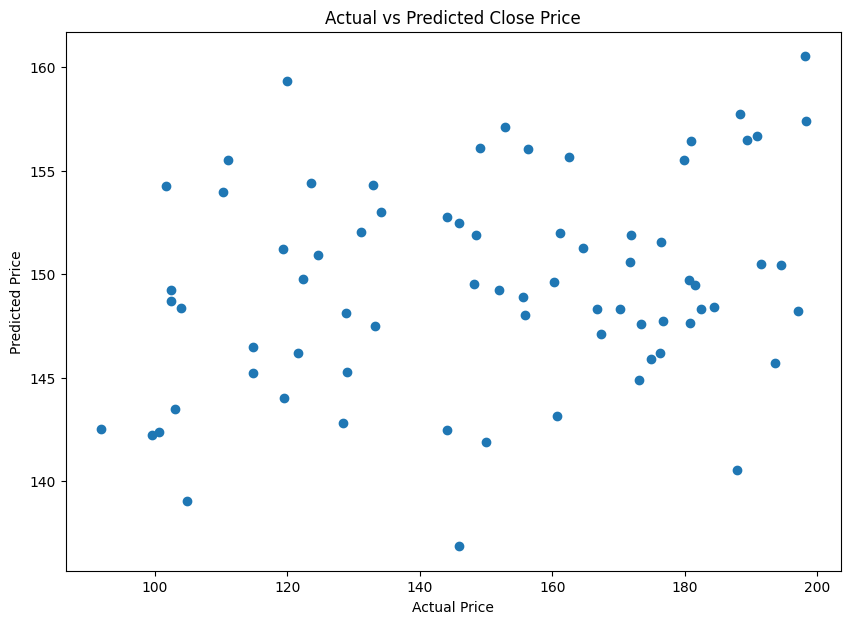


Classification Results
Accuracy: 0.684931506849315
Confusion Matrix:
 [[26  9]
 [14 24]]


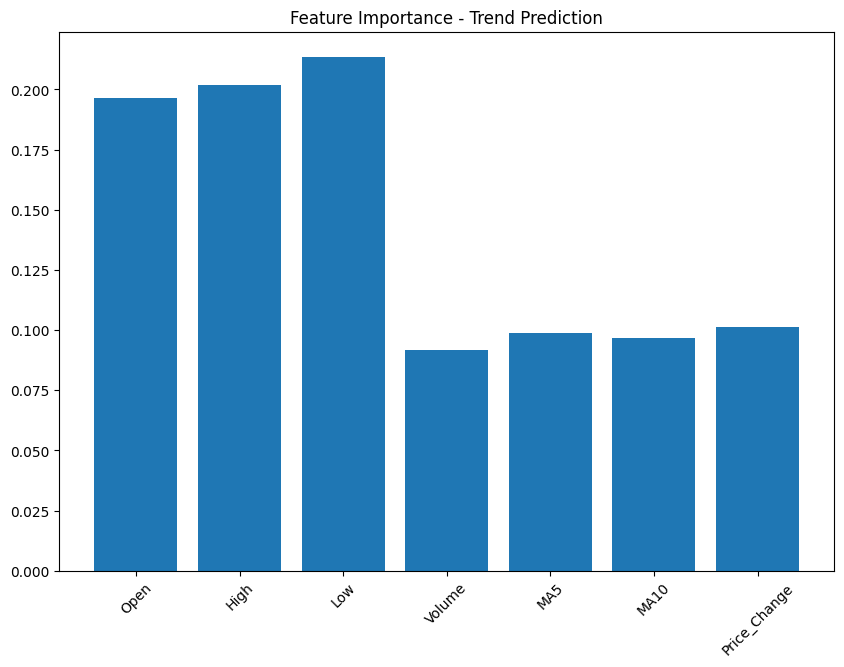


Stock Market Prediction Project Completed Successfully!


In [1]:
# STOCK MARKET PRICE & TREND PREDICTION PROJECT

# 1) Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)


# 2) Create Synthetic Stock Dataset
days = 300
data = pd.DataFrame({
    "Day": np.arange(1, days+1),
    "Open": np.random.uniform(100, 200, days),
    "Volume": np.random.randint(1000, 10000, days)
})

# Simulate Close Price based on Open + random noise
data["Close"] = data["Open"] + np.random.normal(0, 5, days)

# High and Low Prices
data["High"] = data[["Open", "Close"]].max(axis=1) + np.random.uniform(1,5,days)
data["Low"] = data[["Open", "Close"]].min(axis=1) - np.random.uniform(1,5,days)


# 3) Feature Engineering (Technical Indicators)


# 5-Day Moving Average
data["MA5"] = data["Close"].rolling(window=5).mean()

# 10-Day Moving Average
data["MA10"] = data["Close"].rolling(window=10).mean()

# Price Change
data["Price_Change"] = data["Close"] - data["Open"]

# Daily Return
data["Return"] = data["Close"].pct_change()

# Target 1 → Regression (Next Day Close Price)
data["Next_Close"] = data["Close"].shift(-1)

# Target 2 → Classification (Up=1, Down=0)
data["Trend"] = np.where(data["Next_Close"] > data["Close"], 1, 0)

# Remove missing values
data.dropna(inplace=True)

print("Dataset Preview:\n", data.head())

print("===========================================================================")

# 4) Data Visualization
plt.figure(figsize = (10,7))
plt.plot(data["Day"], data["Close"])
plt.title("Stock Closing Price")
plt.xlabel("Day")
plt.ylabel("Close Price")
plt.show()

print("===========================================================================")

plt.figure(figsize = (10,7))
plt.plot(data["Day"], data["MA5"], label="MA5")
plt.plot(data["Day"], data["MA10"], label="MA10")
plt.legend()
plt.title("Moving Averages")
plt.show()

print("===========================================================================")

plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

print("===========================================================================")
# 5) Regression Model (Predict Next Day Close Price)

features = ["Open", "High", "Low", "Volume", "MA5", "MA10", "Price_Change"]

X_reg = data[features]
y_reg = data["Next_Close"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)

y_pred_r = reg_model.predict(X_test_r)

print("\nRegression Results")
print("R2 Score:", r2_score(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))


plt.figure(figsize = (10,7))
plt.scatter(y_test_r, y_pred_r)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Close Price")
plt.show()

print("===========================================================================")
# 6) Classification Model (Predict Trend Up/Down)

X_clf = data[features]
y_clf = data["Trend"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_c, y_train_c)

y_pred_c = rf_model.predict(X_test_c)

print("\nClassification Results")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))


# Feature Importance
importance = rf_model.feature_importances_

plt.figure(figsize = (10,7))
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance - Trend Prediction")
plt.show()

print("\nStock Market Prediction Project Completed Successfully!")